<a href="https://colab.research.google.com/github/ludoveltz/test_github_fev25/blob/main/Exercices_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXERCICE 3**

In [5]:
# 1. Imports complets et explicites
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 2. Chargement et préparation des données
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# 3. Construction du modèle avec Input explicite
model = Sequential([
    Input(shape=(28, 28)),  # Maintenant Input est correctement importé
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
# 4. Compilation du modèle
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# 5. Affichage de la structure du modèle
model.summary()

# 6. Entraînement du modèle
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

# 7. Évaluation sur le jeu de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nPrécision sur le jeu de test: {test_accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8644 - loss: 0.4776 - val_accuracy: 0.9569 - val_loss: 0.1540
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9598 - loss: 0.1365 - val_accuracy: 0.9662 - val_loss: 0.1169
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9722 - loss: 0.0925 - val_accuracy: 0.9710 - val_loss: 0.1008
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9815 - loss: 0.0624 - val_accuracy: 0.9727 - val_loss: 0.0950
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0486 - val_accuracy: 0.9737 - val_loss: 0.0859
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0897

Précision sur le jeu de test: 0.9759


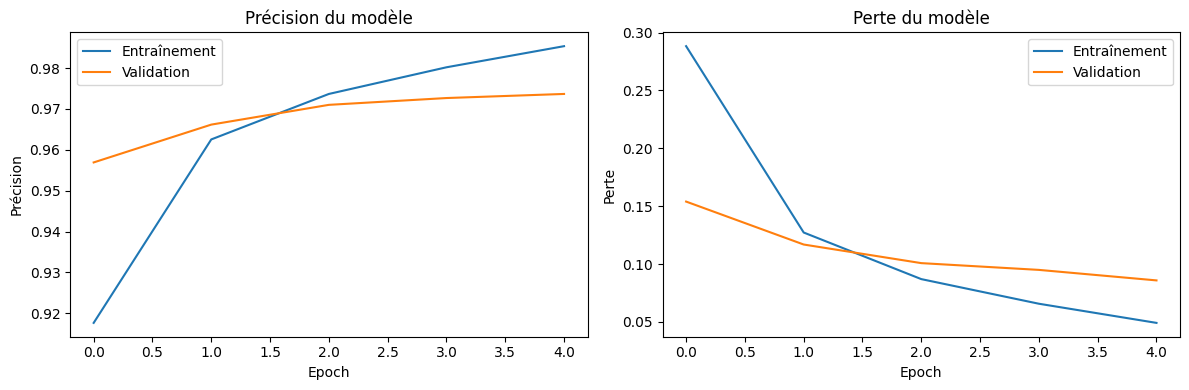

In [9]:
# 8. Visualisation de l'apprentissage
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Graphique de la précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Précision du modèle')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()

# Graphique de la perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte du modèle')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()


**Exercice 6**

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

# 1. Chargement du dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalisation des données
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. One-hot encoding des labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [11]:
# 4. Construction du modèle
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 5. Compilation du modèle
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# 6. Entraînement du modèle
history = model.fit(
    x_train,
    y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 7. Faire des prédictions
predictions = model.predict(x_test)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8621 - loss: 0.4705 - val_accuracy: 0.9548 - val_loss: 0.1533
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9641 - loss: 0.1175 - val_accuracy: 0.9670 - val_loss: 0.1139
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9745 - loss: 0.0799 - val_accuracy: 0.9668 - val_loss: 0.1067
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9820 - loss: 0.0568 - val_accuracy: 0.9709 - val_loss: 0.1066
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9865 - loss: 0.0440 - val_accuracy: 0.9688 - val_loss: 0.1074
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


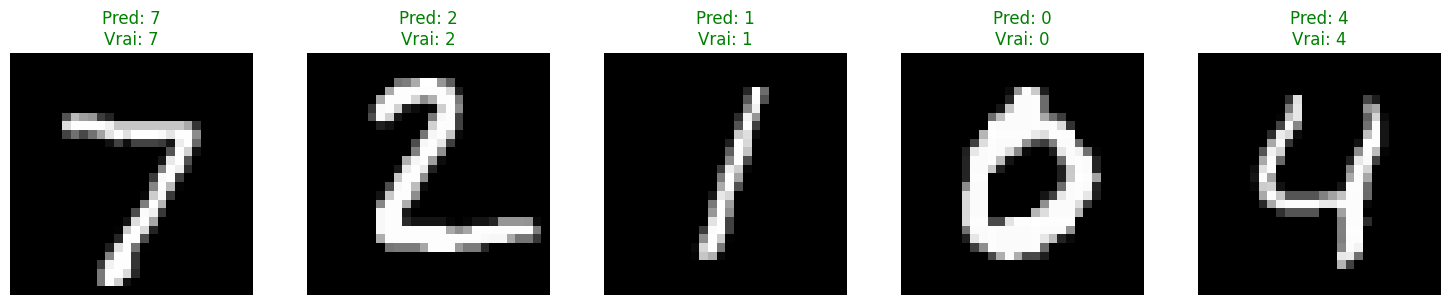

In [13]:
# 8. Visualisation des prédictions
def plot_predictions(x_test, y_test, predictions, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        # Image originale
        plt.subplot(1, num_images, i+1)
        plt.imshow(x_test[i], cmap='gray')

        # Prédiction
        predicted_label = np.argmax(predictions[i])
        true_label = y_test[i]

        # Titre avec prédiction et vraie valeur
        title_color = 'green' if predicted_label == true_label else 'red'
        plt.title(f'Pred: {predicted_label}\nVrai: {true_label}',
                 color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Afficher les prédictions
plot_predictions(x_test, y_test, predictions)

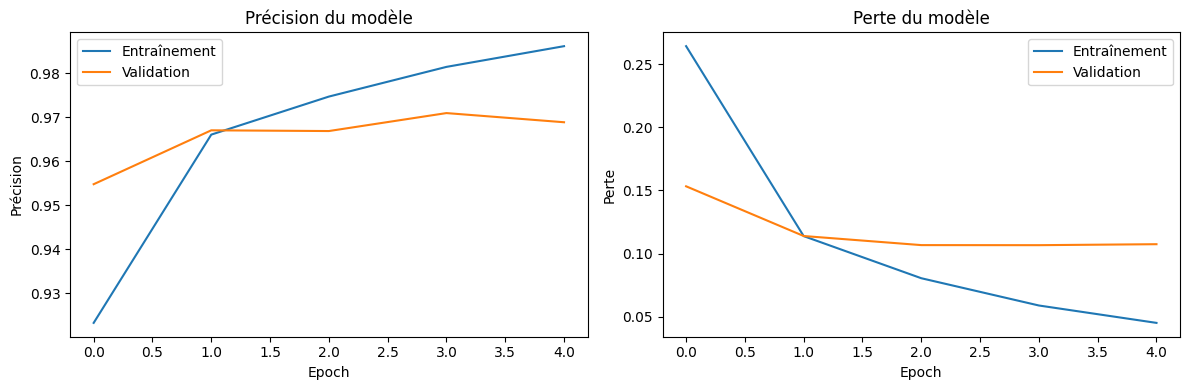

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1122

Précision sur le jeu de test: 0.9706


In [14]:
# 9. Afficher les métriques d'apprentissage
plt.figure(figsize=(12, 4))

# Graphique de la précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Précision du modèle')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()

# Graphique de la perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte du modèle')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()

# Afficher la précision finale
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"\nPrécision sur le jeu de test: {test_accuracy:.4f}")
